In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from itertools import chain
import pingouin as pg
import random

c:\Users\phili\AppData\Local\Programs\Python\Python312\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# get rapid games:
rapid_games = pd.read_csv("../data/rapid_games_Dec15final.csv")
mapping = {
    "username": "category",
    "id": "string",
    "rated": "boolean",
    "status": "category",
    "winner": "category",
    "outcome": "category",
}
rapid_games = rapid_games.astype(mapping)

# convert date strings to date time:
rapid_games["createdAt"] = rapid_games["createdAt"].apply(pd.Timestamp)
rapid_games["lastMoveAt"] = rapid_games["lastMoveAt"].apply(pd.Timestamp)

# convert list strings to lists:
rapid_games["LAN"] = rapid_games["LAN"].apply(ast.literal_eval)
rapid_games["evaluation"] = rapid_games["evaluation"].apply(ast.literal_eval)
rapid_games["cp_losses"] = rapid_games["cp_losses"].apply(ast.literal_eval)
rapid_games["moveTimes"] = rapid_games["moveTimes"].apply(ast.literal_eval)
rapid_games["dateCreated"] = rapid_games["createdAt"].apply(lambda x: x.to_pydatetime().date())

In [27]:
rapid_games["general_opening"] = rapid_games["opening"].str.split(":")
rapid_games["general_opening"] = rapid_games["general_opening"].apply(lambda x : x[0])
cp_loss_by_opening = rapid_games.groupby("general_opening")["averaged_cp_loss"].mean()
counts_by_opening = rapid_games.groupby("general_opening")["averaged_cp_loss"].count()

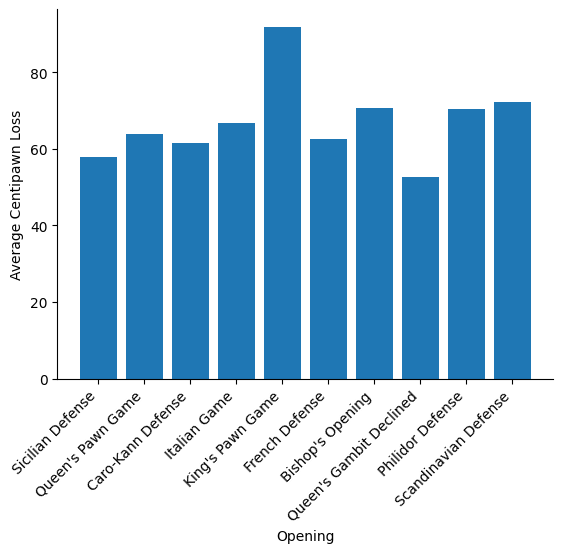

In [44]:
top10 = list(counts_by_opening.sort_values(ascending=False)[:10].index)
top10_openings = cp_loss_by_opening[top10]
top10_openings
plt.bar(top10_openings.index, top10_openings.values)
plt.xlabel("Opening")
plt.ylabel("Average Centipawn Loss")
plt.xticks(rotation=45, ha="right")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()